In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("diabetes-dataset 2.csv")

In [3]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


# Data Pre-Processing

First, we will describe the dataset in order to check whether there is null value present or not and what is the quality of our data.

In [4]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


As we can see from info() and describe() method, there is no null value present. However, min value for Glucose, Blood pressure, Skin thickness and insulin is zero which is practically not possible so these zeros can be considered as outlier which we need to remove.

In [6]:
df = dataframe.copy()

In [7]:
df["Glucose"].replace(0, df["Glucose"].mean(), inplace=True)
df["BloodPressure"].replace(0, df["BloodPressure"].mean(), inplace=True)
df["SkinThickness"].replace(0, df["SkinThickness"].mean(), inplace=True)
df["Insulin"].replace(0, df["Insulin"].mean(), inplace=True)
df["BMI"].replace(0, df["BMI"].mean(), inplace=True)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.970186,72.257047,26.932877,118.615412,32.643702,0.470930,33.090500,0.342000
std,3.306063,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Now, we can see that the Glucose, Blood pressure, Skin thickness and Insulin do not have any zero value present as we have replaced zero with individual column's mean value

# Data balancing

Now, we will check whether our data is balanced or not.

([<matplotlib.patches.Wedge at 0x122b85520>,
 [Text(-0.5238620008512992, 0.9672479537657722, 'Healthy'),
  Text(0.5714858191105077, -1.0551795859262973, 'Diabetics')],
 [Text(-0.2857429095552541, 0.5275897929631485, '65.80%'),
  Text(0.3333667278144628, -0.6155214251236735, '34.20%')])

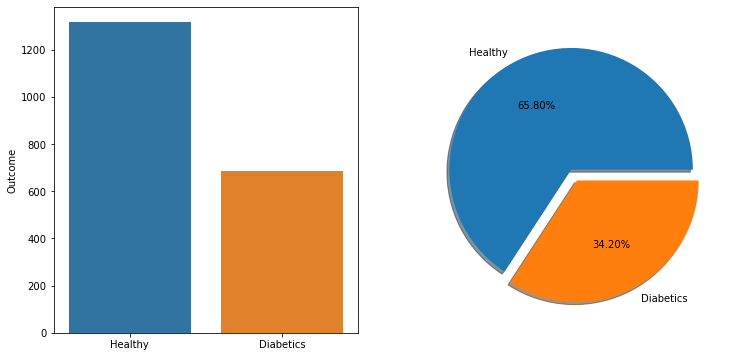

In [9]:
labels = ['Healthy', 'Diabetics']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
sns.barplot(y = df['Outcome'].value_counts(),x = labels, ax = ax1)
explode=np.zeros(len(labels))
explode[-1]=0.1
ax2.pie(df['Outcome'].value_counts(), labels = labels,shadow=True, autopct='%.2f%%', explode = explode)

It can be seen that nearly 66% patients are healthy and 34% of them are suffered from Diabetes. Here, our data is unbalanced so we need to balance it. Here, we will use Smote method to balance the dataset.

In [10]:
df1 = df.copy()

print('Original class distribution:')
print(df1['Outcome'].value_counts())

xf = df1.columns
X = df1.drop(['Outcome'],axis=1)
Y = df1['Outcome']

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

df1 = pd.DataFrame(X, columns=xf)
df1['Outcome'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
0    1316
1     684
Name: Outcome, dtype: int64

Class distribution after applying SMOTE Technique:
1    1316
0    1316
Name: Outcome, dtype: int64


In [11]:
print(df1.shape)
X = df1.drop(['Outcome'],axis=1)
Y = df1['Outcome']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

(2632, 9)
Original set  --->  (2632, 8) (2632,) 
Training set  --->  (2105, 8) (2105,) 
Testing set   --->  (527, 8)  (527,)


Now, we will apply stnadard scaling in order to see the distributation of data based on standard deviation.

In [12]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

print('Standardization on Training set')
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('Standardization on Testing set')
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

Standardization on Training set


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03,2.105000e+03
mean,-7.331164e-17,-1.162438e-16,-6.096997e-16,-4.463044e-16,1.106531e-16,-5.552697e-16,-1.732845e-16,1.122881e-16
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-1.169774e+00,-2.678352e+00,-4.156531e+00,-2.125367e+00,-1.188643e+00,-2.123442e+00,-1.256844e+00,-1.119536e+00
25%,-8.717380e-01,-7.580969e-01,-6.074216e-01,-6.763752e-01,-4.715264e-01,-6.791136e-01,-7.128594e-01,-8.589150e-01
50%,-2.756657e-01,-1.164541e-01,-1.004060e-01,-3.576698e-01,-4.715264e-01,-7.022995e-02,-2.727821e-01,-3.376726e-01
75%,6.184427e-01,6.618441e-01,5.756149e-01,5.781699e-01,1.751489e-01,5.386537e-01,4.790166e-01,6.179384e-01
max,3.896840e+00,2.348157e+00,4.124724e+00,8.584798e+00,6.712689e+00,6.712451e+00,5.900524e+00,4.092888e+00


Standardization on Testing set


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,0.020674,-0.018925,-0.094880,-0.001664,-0.001435,0.028851,-0.050818,0.017735
std,1.019340,1.003845,0.964174,1.048820,1.007632,0.942725,0.940933,0.992825
min,-1.169774,-2.289203,-4.156531,-2.021385,-1.177819,-2.123442,-1.238507,-1.119536
25%,-0.871738,-0.797465,-0.691924,-0.676375,-0.471526,-0.636633,-0.719434,-0.772041
50%,-0.275666,-0.116454,-0.199378,-0.253688,-0.471526,-0.030170,-0.327792,-0.250799
75%,0.618443,0.661844,0.556178,0.578170,0.175149,0.566974,0.460372,0.704812
max,3.896840,2.302473,3.448703,8.584798,5.154070,4.418517,3.926223,3.311024


Let us see the correlation plot

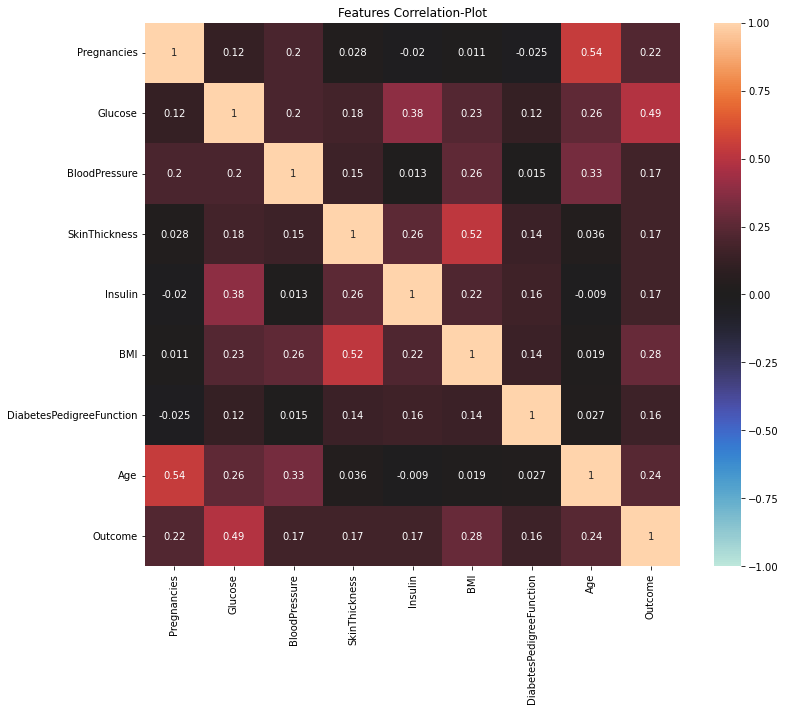

In [14]:
features = df.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [21]:
from scikitplot.metrics import plot_roc

Evaluation_Results = pd.DataFrame(np.zeros((4,4)), columns=['Accuracy', 'Precision','Recall','F1-score'])

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100
    
    print('{}{} Evaluating {}{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('Confusiton Matrix:\n',confusion_matrix(Test_Y, pred))
    print('Classification Report:\n',classification_report(Test_Y, pred))
    
    
    plt.show()

In [22]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

<<<----------------------------------- Evaluating 1----------------------------------->>>

Accuracy = 71.3%
F1 Score = 71.3%
Confusiton Matrix:
 [[189  80]
 [ 71 187]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71       269
           1       0.70      0.72      0.71       258

    accuracy                           0.71       527
   macro avg       0.71      0.71      0.71       527
weighted avg       0.71      0.71      0.71       527



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

#Gradient Boosting Classifier
GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y) # Fit the gradient boosting model.
parameters = {
    "n_estimators":[5,20,100,500],        # The number of boosting stages to perform. overfitting i.e model learns the details and noise of the training dataset to increase the accuracy
    "max_depth":[1,3,5,7,9],              # The maximum depth limits the number of nodes in the tree. 
    "learning_rate":[0.01,0.1,1,10,100]   # How fast the model learns. Using a low learning rate can dramatically improve the perfomance of your gradient boosting model.
    }

rs_CV = RandomizedSearchCV(GB_model, 
                         parameters, 
                         n_iter = 50,     # Number of parameter settings that are sampled. 
                         n_jobs = -1,     # Number of jobs to run in parallel.Here -1 using all processors parallelly
                         cv = 5,          # Determines the cross-validation splitting strategy.
                         random_state = 42) # 

GB = rs_CV.fit(Train_X_std, Train_Y).best_estimator_
GB_best_params = rs_CV.fit(Train_X_std, Train_Y).best_params_


predict = GB.predict(Test_X_std)
predict_prob = GB.predict_proba(Test_X_std)

Classification_Summary(predict,predict_prob,0)
print("Best HyperParameters : " , GB_best_params)

<<<----------------------------------- Evaluating 0----------------------------------->>>

Accuracy = 98.3%
F1 Score = 98.3%
Confusiton Matrix:
 [[261   8]
 [  1 257]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       269
           1       0.97      1.00      0.98       258

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

Best HyperParameters :  {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.1}


In [26]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

<<<----------------------------------- Evaluating 3----------------------------------->>>

Accuracy = 98.1%
F1 Score = 98.1%
Confusiton Matrix:
 [[262   7]
 [  3 255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       269
           1       0.97      0.99      0.98       258

    accuracy                           0.98       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.98      0.98      0.98       527

